In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the data

https://www.macrotrends.net/stocks/charts/BRK.A/berkshire-hathaway/stock-price-history

In [74]:
brk = pd.read_csv('brk_stock_data.csv',skiprows=14)
print(brk['date'][0],brk['date'].dtype)
brk.head(3)

1980-03-17 object


,date,open,high,low,close,volume
0,1980-03-17,290.0,310.0,290.0,290.0,10000
1,1980-03-18,290.0,290.0,290.0,290.0,0
2,1980-03-19,290.0,310.0,290.0,290.0,20000


In [69]:
brk.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

### Date Formatting

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [75]:
# Format refers to the current state of the date string
brk['date'] = pd.to_datetime(brk['date'],format='%Y-%m-%d')
print(brk['date'][0],brk['date'].dtype)

1980-03-17 00:00:00 datetime64[ns]


In [72]:
# Format refers to the desired string
brk['date'] = brk['date'].dt.strftime('%d/%m/%Y')
print(brk['date'][0],brk['date'].dtype)

17/03/1980 object


### Date as an index

In [76]:
brk = brk.set_index('date')
brk.head(3)

,open,high,low,close,volume
date,,,,,
1980-03-17,290.0,310.0,290.0,290.0,10000
1980-03-18,290.0,290.0,290.0,290.0,0
1980-03-19,290.0,310.0,290.0,290.0,20000


### Date slicing

In [78]:
brk['2008-09-10':'2008-09-20']

,open,high,low,close,volume
date,,,,,
2008-09-10,118500.0,118500.0,117000.0,117000.0,59600
2008-09-11,116200.0,117500.0,115500.0,117500.0,52000
2008-09-12,116700.0,119500.0,116310.0,119500.0,86500
2008-09-15,117000.0,123100.0,115500.0,119900.0,223200
2008-09-16,119000.0,125010.0,118300.0,125000.0,256200
2008-09-17,125000.0,125600.0,122900.0,124800.0,180000
2008-09-18,126000.0,128900.0,121310.0,128010.0,276500
2008-09-19,130000.0,147000.0,127901.0,147000.0,422800


In [6]:
brk['2008-07-01':'2010-01-01']

,open,high,low,close,volume
date,,,,,
2008-07-01,119600.0,120710.0,119100.0,120100.0,56600
2008-07-02,119600.0,120100.0,118500.0,118665.0,59800
2008-07-03,118400.0,119000.0,114110.0,116700.0,130000
2008-07-07,118900.0,119700.0,115500.0,118440.0,82500
2008-07-08,118440.0,119350.0,117900.0,118750.0,73700
...,...,...,...,...,...
2009-12-24,98700.0,99400.0,98100.0,98895.0,49900
2009-12-28,98200.0,98994.0,98141.0,98530.0,102600
2009-12-29,98400.0,98870.0,98400.0,98550.0,75700


In [ ]:
brk.head(12)

### Filling date gaps

In [79]:
brk[4:6]

,open,high,low,close,volume
date,,,,,
1980-03-21,290.0,290.0,290.0,290.0,0
1980-03-24,290.0,290.0,270.0,270.0,10000


In [80]:
brk[4:6].resample('1d').asfreq()

,open,high,low,close,volume
date,,,,,
1980-03-21,290.0,290.0,290.0,290.0,0.0
1980-03-22,NaN,NaN,NaN,NaN,NaN
1980-03-23,NaN,NaN,NaN,NaN,NaN
1980-03-24,290.0,290.0,270.0,270.0,10000.0


In [81]:
brk[4:6].resample('1d').pad()

,open,high,low,close,volume
date,,,,,
1980-03-21,290.0,290.0,290.0,290.0,0
1980-03-22,290.0,290.0,290.0,290.0,0
1980-03-23,290.0,290.0,290.0,290.0,0
1980-03-24,290.0,290.0,270.0,270.0,10000


In [82]:
brk[4:6].resample('1d').bfill()

,open,high,low,close,volume
date,,,,,
1980-03-21,290.0,290.0,290.0,290.0,0
1980-03-22,290.0,290.0,270.0,270.0,10000
1980-03-23,290.0,290.0,270.0,270.0,10000
1980-03-24,290.0,290.0,270.0,270.0,10000


In [83]:
brk[4:6].resample('1d').ffill()

,open,high,low,close,volume
date,,,,,
1980-03-21,290.0,290.0,290.0,290.0,0
1980-03-22,290.0,290.0,290.0,290.0,0
1980-03-23,290.0,290.0,290.0,290.0,0
1980-03-24,290.0,290.0,270.0,270.0,10000


### Resampling

In [84]:
brk[2:4].resample('6h').asfreq()

,open,high,low,close,volume
date,,,,,
1980-03-19 00:00:00,290.0,310.0,290.0,290.0,20000.0
1980-03-19 06:00:00,NaN,NaN,NaN,NaN,NaN
1980-03-19 12:00:00,NaN,NaN,NaN,NaN,NaN
1980-03-19 18:00:00,NaN,NaN,NaN,NaN,NaN
1980-03-20 00:00:00,290.0,290.0,290.0,290.0,0.0


### Unsampling

In [86]:
brk[:15]

,open,high,low,close,volume
date,,,,,
1980-03-17,290.0,310.0,290.0,290.0,10000
1980-03-18,290.0,290.0,290.0,290.0,0
1980-03-19,290.0,310.0,290.0,290.0,20000
1980-03-20,290.0,290.0,290.0,290.0,0
1980-03-21,290.0,290.0,290.0,290.0,0
1980-03-24,290.0,290.0,270.0,270.0,10000
1980-03-25,270.0,270.0,270.0,270.0,0
1980-03-26,270.0,270.0,270.0,270.0,0
1980-03-27,270.0,270.0,270.0,270.0,0


In [88]:
brk['volume'].resample('1w').sum()

date
1980-03-23     30000
1980-03-30     10000
1980-04-06     50000
1980-04-13    120000
1980-04-20     70000
               ...  
2019-10-27      1423
2019-11-03      2377
2019-11-10      2165
2019-11-17       921
2019-11-24       499
Freq: W-SUN, Name: volume, Length: 2071, dtype: int64

### Differentiating

In [98]:
brk['prev_day_open'] =  brk['open'].shift(1)
brk['daily_returns'] = (brk['open'] / brk['prev_day_open'] -1) *100

In [99]:
brk.tail()

,open,high,low,close,volume,next_day_vol,prev_day_open,daily_returns
date,,,,,,,,
2019-11-13,329150.00,330025.00,328239.99,329402.0,183,135.0,331850.00,-0.813621
2019-11-14,329500.00,329891.99,327119.89,329302.0,166,183.0,329150.00,0.106334
2019-11-15,329400.00,330269.08,328455.00,329405.0,318,166.0,329500.00,-0.030349
2019-11-18,330000.05,330499.99,327800.00,329225.0,248,318.0,329400.00,0.182165
2019-11-19,329860.00,329900.00,328315.00,328601.0,251,248.0,330000.05,-0.042439


In [ ]:
brk['volume_diff'] = brk['volume'] - brk['volume'].shift(1)
brk.head()

### Simple Moving Average

In [100]:
brk[-5:]

,open,high,low,close,volume,next_day_vol,prev_day_open,daily_returns
date,,,,,,,,
2019-11-13,329150.00,330025.00,328239.99,329402.0,183,135.0,331850.00,-0.813621
2019-11-14,329500.00,329891.99,327119.89,329302.0,166,183.0,329150.00,0.106334
2019-11-15,329400.00,330269.08,328455.00,329405.0,318,166.0,329500.00,-0.030349
2019-11-18,330000.05,330499.99,327800.00,329225.0,248,318.0,329400.00,0.182165
2019-11-19,329860.00,329900.00,328315.00,328601.0,251,248.0,330000.05,-0.042439


In [107]:
brk[-5:].rolling(window = 3).mean()

,open,high,low,close,volume,next_day_vol,prev_day_open,daily_returns
date,,,,,,,,
2019-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-15,329350.00,330062.023333,327938.293333,329369.666667,222.333333,161.333333,330166.666667,-0.245878
2019-11-18,329633.35,330220.353333,327791.630000,329310.666667,244.000000,222.333333,329350.000000,0.086050
2019-11-19,329753.35,330223.023333,328190.000000,329077.000000,272.333333,244.000000,329633.350000,0.036459


In [108]:
brk[-5:].rolling(window = '3d',min_periods=3).mean()

,open,high,low,close,volume,next_day_vol,prev_day_open,daily_returns
date,,,,,,,,
2019-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-15,329350.0,330062.023333,327938.293333,329369.666667,222.333333,161.333333,330166.666667,-0.245878
2019-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exponential Weighted Moving Average

In [109]:
brk[-5:].ewm(halflife = 1).mean()

,open,high,low,close,volume,next_day_vol,prev_day_open,daily_returns
date,,,,,,,,
2019-11-13,329150.000000,330025.000000,328239.990000,329402.000000,183.000000,135.000000,331850.000000,-0.813621
2019-11-14,329383.333333,329936.326667,327493.256667,329335.333333,171.666667,167.000000,330050.000000,-0.200317
2019-11-15,329392.857143,330126.471429,328042.824286,329375.142857,255.285714,166.428571,329735.714286,-0.103193
2019-11-18,329716.693333,330325.681333,327913.318000,329295.066667,251.400000,247.266667,329556.666667,0.048998
2019-11-19,329790.658065,330105.974839,328120.637742,328936.838710,251.193548,247.645161,329785.509677,0.001804


### Application

In [112]:
brk = brk.resample('1w').mean()
for col in list(['open','volume']):
    brk[col+'_diff'] = brk[col] - brk[col].shift(1)
brk[['open_diff','volume_diff']]

,open_diff,volume_diff
date,,
1980-03-23,NaN,NaN
1980-03-30,-16.000,-4000.0
1980-04-06,-11.500,10500.0
1980-04-13,1.500,11500.0
1980-04-20,-10.000,-10000.0
...,...,...
2019-10-27,3124.056,86.6
2019-11-03,3385.810,190.8
2019-11-10,11558.190,-42.4


## Checking for Stationarity

In [113]:
from statsmodels.tsa.stattools import adfuller
ts = brk['open']
adfuller(ts)

(2.8657217020010677,
 1.0,
 26,
 2044,
 {'1%': -3.4335532932197967,
  '5%': -2.8629550592036455,
  '10%': -2.5675233142202276},
 37304.79500738651)

## Detrending

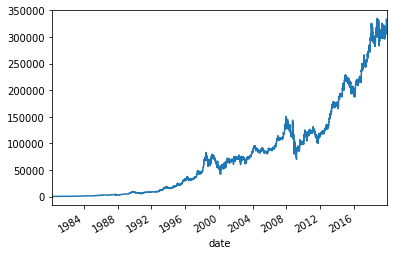

In [38]:
ts.plot()

### log

0.9990848698289482

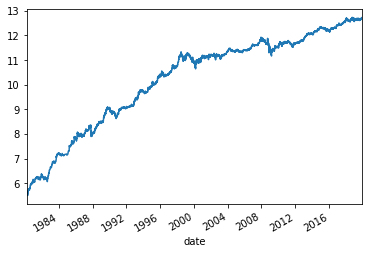

In [43]:
ts_log = np.log(ts)
ts_log.plot()
adfuller(ts)[1]

0.9990848698289482

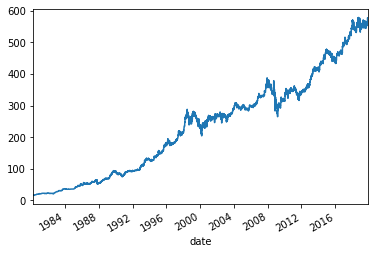

In [44]:
ts_sqrt = np.sqrt(ts)
ts_sqrt.plot()
adfuller(ts)[1]

0.9990848698289482

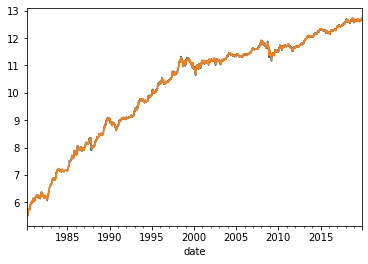

In [51]:
ts_log_rs = ts_log.resample('1d').pad()
ts_log_rs.plot()
logsma7 = ts_log_rs.rolling('7d').mean()
logsma7.plot()
adfuller(ts)[1]

0.0

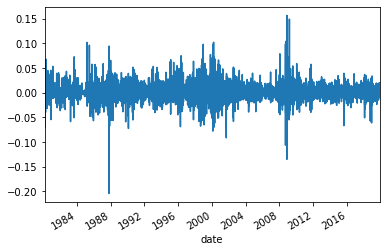

In [61]:
loglag1 = ts_log.shift(1).bfill()
logdiff1 = ts_log - loglag1
logdiff1.plot()
adfuller(logdiff1)[1]

0.0

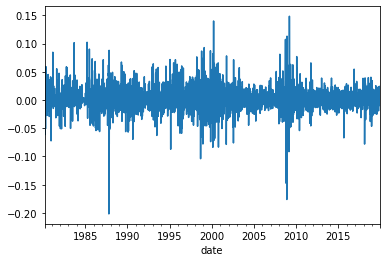

In [53]:
ts_log_rs_nt = ts_log_rs-logsma7
ts_log_rs_nt.plot()
adfuller(ts_log_rs_nt)[1]

## Decomposing

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts,model='additive')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend.plot()
seasonal.plot()
residual.plot()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index with a freq not set to None